<a href="https://colab.research.google.com/github/enitin-agarwal/azureforaws/blob/master/Mimiciii_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path

# Make pandas dataframes prettier
from IPython.display import display, HTML

# Access data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

In [21]:
auth.authenticate_user()

In [22]:
# create and test connection to the database MimicIII
client = bigquery.Client(project='physionet-data')

# load the dataset list
datasets = client.list_datasets()

# iterate the datasets list
for dataset in datasets:
    did = dataset.dataset_id
    # print the dataset name
    print('Dataset "{}" has the following tables: '.format(did))
    # iterate the tables on the dataset
    for table in client.list_tables(client.dataset(did)):
        # print the table name
        print('- {}'.format(table.table_id))

Dataset "eicu_crd_demo" has the following tables: 
- admissiondrug
- admissiondx
- allergy
- apacheapsvar
- apachepatientresult
- apachepredvar
- careplancareprovider
- careplaneol
- careplangeneral
- careplangoal
- careplaninfectiousdisease
- customlab
- diagnosis
- hospital
- infusiondrug
- intakeoutput
- lab
- medication
- microlab
- note
- nurseassessment
- nursecare
- nursecharting
- pasthistory
- patient
- physicalexam
- respiratorycare
- respiratorycharting
- treatment
- vitalaperiodic
- vitalperiodic
Dataset "mimiciii_clinical" has the following tables: 
- admissions
- callout
- caregivers
- chartevents
- cptevents
- d_cpt
- d_icd_diagnoses
- d_icd_procedures
- d_items
- d_labitems
- datetimeevents
- diagnoses_icd
- drgcodes
- icustays
- inputevents_cv
- inputevents_mv
- labevents
- microbiologyevents
- outputevents
- patients
- prescriptions
- procedureevents_mv
- procedures_icd
- services
- transfers
Dataset "mimiciii_demo" has the following tables: 
- admissions
- callout
- 

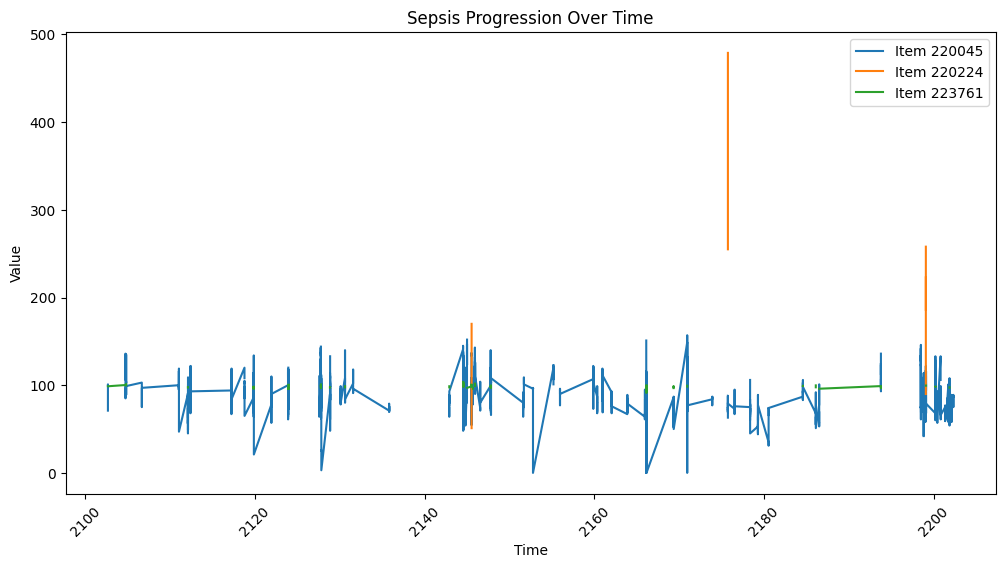

In [24]:
# Load datasets for Sepsis Progression over Time

auth.authenticate_user()
project_id='ultimate-balm-449016-q6' #My Project Name for accessing Big Query
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
# create a connection to the database
client = bigquery.Client(project='ultimate-balm-449016-q6')

# load the dataset list
datasets = client.list_datasets()

#dataset_ref = bigquery.DatasetReference(project, dataset_id)
project = "physionet-data"  # Replace with your project ID
dataset_id = "mimiciii_demo"  # Replace with your dataset ID
table_id1 = "chartevents"
table_id2 = "labevents"

# Construct table references
table_ref1 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id1}")
table_ref2 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id2}")

# Get table objects
table1 = client.get_table(table_ref1)
table2 = client.get_table(table_ref2)

# Load data into dataframes
chartevents = client.list_rows(table1).to_dataframe()
labevents = client.list_rows(table2).to_dataframe()

# Define sepsis-related vitals and lab tests
sepsis_items = [220045, 220224, 223761]  # Example ITEMIDs (HR, Lactate, Temperature)
#sepsis_patients = chartevents[chartevents['ITEMID'].isin(sepsis_items)]
sepsis_patients.loc[:, 'CHARTTIME'] = pd.to_datetime(sepsis_patients['CHARTTIME'])

# Aggregate by time for visualization
sepsis_patients['CHARTTIME'] = pd.to_datetime(sepsis_patients['CHARTTIME'])
sepsis_timeline = sepsis_patients.groupby(['CHARTTIME', 'ITEMID'])['VALUENUM'].mean().unstack()

# Plot
plt.figure(figsize=(12, 6))
for col in sepsis_timeline.columns:
    plt.plot(sepsis_timeline.index, sepsis_timeline[col], label=f"Item {col}")

plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Sepsis Progression Over Time")
a=plt.xticks(rotation=45)

In [17]:
#Drug Categories Distribution
import pandas as pd
import plotly.express as px

project = "physionet-data"  # Replace with your project ID
dataset_id = "mimiciii_demo"  # Replace with your dataset ID
table_id1 = "prescriptions"

# Construct table references
table_ref1 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id1}")

# Get table objects
table1 = client.get_table(table_ref1)

# Load data into dataframes
prescriptions = client.list_rows(table1).to_dataframe()

# Assume we have a column mapping drugs to categories
if 'CATEGORY' not in prescriptions.columns:
    # Creating dummy drug categories (in real data, CATEGORY should exist)
    drug_category_map = {
    # Painkillers
    "Aspirin": "Painkiller", "Morphine": "Painkiller", "Ibuprofen": "Painkiller", "Acetaminophen": "Painkiller",
    "Codeine": "Painkiller", "Tramadol": "Painkiller", "Naproxen": "Painkiller", "Fentanyl": "Painkiller",

    # Antibiotics
    "Amoxicillin": "Antibiotic", "Ceftriaxone": "Antibiotic", "Vancomycin": "Antibiotic",
    "Azithromycin": "Antibiotic", "Doxycycline": "Antibiotic", "Levofloxacin": "Antibiotic",
    "Ciprofloxacin": "Antibiotic", "Penicillin": "Antibiotic", "Clindamycin": "Antibiotic",

    # Diabetes Medications
    "Metformin": "Diabetes", "Insulin": "Diabetes", "Glipizide": "Diabetes", "Glyburide": "Diabetes",
    "Pioglitazone": "Diabetes", "Sitagliptin": "Diabetes", "Canagliflozin": "Diabetes", "Empagliflozin": "Diabetes",

    # Hypertension Medications
    "Losartan": "Hypertension", "Lisinopril": "Hypertension", "Amlodipine": "Hypertension",
    "Hydrochlorothiazide": "Hypertension", "Metoprolol": "Hypertension", "Atenolol": "Hypertension",
    "Valsartan": "Hypertension", "Enalapril": "Hypertension", "Diltiazem": "Hypertension",

    # Cholesterol Management
    "Atorvastatin": "Cholesterol", "Simvastatin": "Cholesterol", "Rosuvastatin": "Cholesterol",
    "Pravastatin": "Cholesterol", "Lovastatin": "Cholesterol", "Ezetimibe": "Cholesterol",

    # Gastrointestinal Medications
    "Omeprazole": "Gastrointestinal", "Pantoprazole": "Gastrointestinal", "Lansoprazole": "Gastrointestinal",
    "Ranitidine": "Gastrointestinal", "Famotidine": "Gastrointestinal", "Esomeprazole": "Gastrointestinal",

    # Steroids & Anti-inflammatory
    "Prednisone": "Steroid", "Dexamethasone": "Steroid", "Hydrocortisone": "Steroid",
    "Methylprednisolone": "Steroid", "Fluticasone": "Steroid", "Triamcinolone": "Steroid",

    # Thyroid Medications
    "Levothyroxine": "Thyroid", "Liothyronine": "Thyroid",

    # Blood Thinners & Anticoagulants
    "Warfarin": "Anticoagulant", "Heparin": "Anticoagulant", "Rivaroxaban": "Anticoagulant",
    "Apixaban": "Anticoagulant", "Dabigatran": "Anticoagulant",

    # Respiratory Medications
    "Albuterol": "Respiratory", "Salmeterol": "Respiratory", "Ipratropium": "Respiratory",
    "Fluticasone": "Respiratory", "Montelukast": "Respiratory", "Budesonide": "Respiratory",

    # Psychiatric & Neurological Medications
    "Sertraline": "Antidepressant", "Fluoxetine": "Antidepressant", "Paroxetine": "Antidepressant",
    "Citalopram": "Antidepressant", "Venlafaxine": "Antidepressant", "Duloxetine": "Antidepressant",
    "Bupropion": "Antidepressant", "Amitriptyline": "Antidepressant",

    "Diazepam": "Anxiolytic", "Lorazepam": "Anxiolytic", "Alprazolam": "Anxiolytic",
    "Clonazepam": "Anxiolytic", "Buspirone": "Anxiolytic",

    "Haloperidol": "Antipsychotic", "Risperidone": "Antipsychotic", "Olanzapine": "Antipsychotic",
    "Quetiapine": "Antipsychotic", "Aripiprazole": "Antipsychotic",

    "Gabapentin": "Neurological", "Pregabalin": "Neurological", "Phenytoin": "Neurological",
    "Levetiracetam": "Neurological", "Carbamazepine": "Neurological", "Lamotrigine": "Neurological",

    # Other Medications
    "Hydroxychloroquine": "Autoimmune", "Methotrexate": "Autoimmune", "Cyclophosphamide": "Autoimmune",
    "Tacrolimus": "Immunosuppressant", "Cyclosporine": "Immunosuppressant", "Mycophenolate": "Immunosuppressant",
}
  # Assign categories to drugs in PRESCRIPTIONS dataset
prescriptions['CATEGORY'] = prescriptions['DRUG'].map(drug_category_map).fillna("Other")

# Count frequency of each drug category
category_counts = prescriptions['CATEGORY'].value_counts().reset_index()
category_counts.columns = ['CATEGORY', 'COUNT']

# Create treemap visualization with visible text labels
fig = px.treemap(category_counts, path=['CATEGORY'], values='COUNT',
                 title="Drug Categories Distribution",
                 color='COUNT', color_continuous_scale="Blues",
                 labels={"COUNT": "Prescriptions", "CATEGORY": "Drug Category"})

# Ensure text labels and values are shown directly on the chart
fig.update_traces(texttemplate="%{label}<br>Count: %{value}", textposition="middle center")

# Save and show the figure
fig.write_html("drug_categories_treemap.html")
fig.show()


<ipython-input-25-94f7403b0099>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




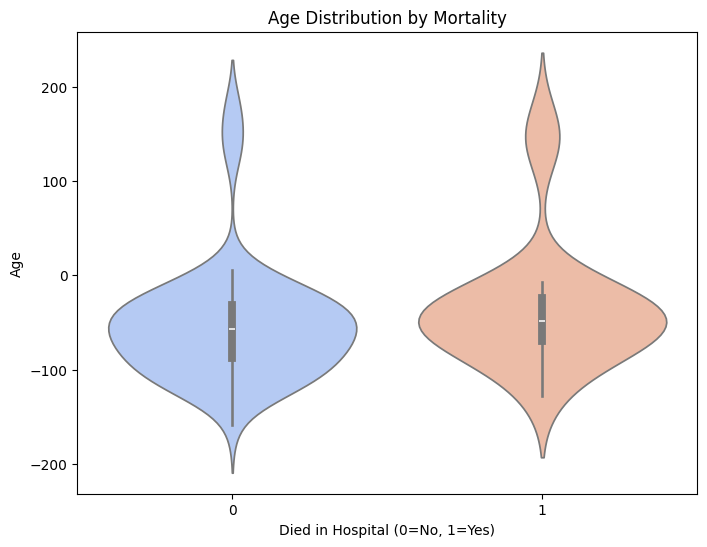

In [25]:
#Age Distribution by Mortality
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

#dataset_ref = bigquery.DatasetReference(project, dataset_id)
project = "physionet-data"  # Replace with your project ID
dataset_id = "mimiciii_demo"  # Replace with your dataset ID
table_id1 = "patients"
table_id2 = "admissions"

# Construct table references
table_ref1 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id1}")
table_ref2 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id2}")

# Get table objects
table1 = client.get_table(table_ref1)
table2 = client.get_table(table_ref2)

# Load data into dataframes
patients = client.list_rows(table1).to_dataframe()
admissions = client.list_rows(table2).to_dataframe()
patients['age'] = 2022 - pd.to_datetime(patients['DOB']).dt.year
merged = patients.merge(admissions[['SUBJECT_ID', 'HOSPITAL_EXPIRE_FLAG']], on='SUBJECT_ID')
plt.figure(figsize=(8, 6))
sns.violinplot(x=merged['HOSPITAL_EXPIRE_FLAG'], y=merged['age'], palette="coolwarm")
plt.xlabel("Died in Hospital (0=No, 1=Yes)")
plt.ylabel("Age")
plt.title("Age Distribution by Mortality")
plt.savefig('age_mortality_violin.png')
plt.show()


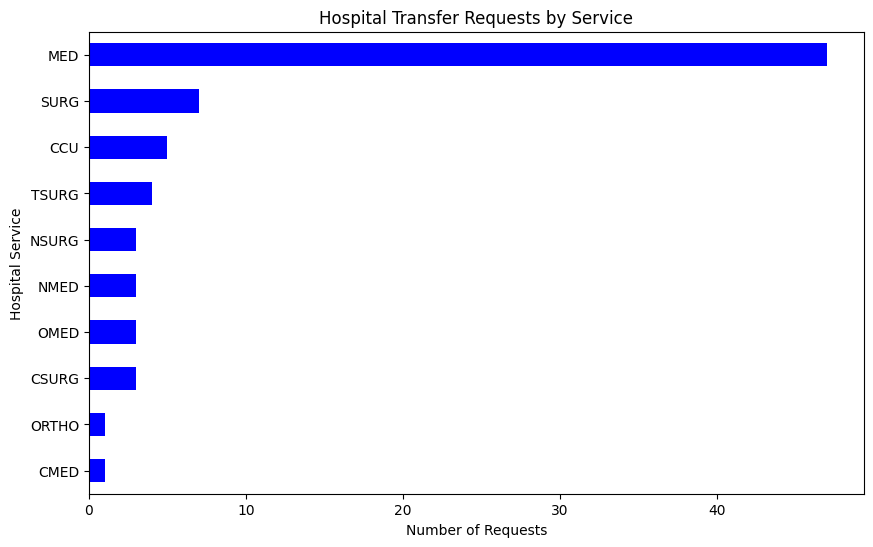

<ipython-input-26-f279c4aa70c0>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-f279c4aa70c0>:37: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [26]:
#Hospitals Transfer by service and Antibiotic Prescriptions trend
import plotly.express as px

# load the dataset list
datasets = client.list_datasets()

# Load dataset
#dataset_ref = bigquery.DatasetReference(project, dataset_id)
project = "physionet-data"  # Replace with your project ID
dataset_id = "mimiciii_demo"  # Replace with your dataset ID
table_id1 = "callout"
table_id2 = "prescriptions"
# Construct table references
table_ref1 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id1}")
table_ref2 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id2}")
# Get table objects
table1 = client.get_table(table_ref1)
table2 = client.get_table(table_ref2)
# Load data into dataframes
callouts = client.list_rows(table1).to_dataframe()
prescriptions = client.list_rows(table2).to_dataframe()
# Count most requested transfer services
transfer_requests = callouts['CALLOUT_SERVICE'].value_counts().head(10)
# Bar chart
plt.figure(figsize=(10, 6))
transfer_requests.sort_values().plot(kind='barh', color='blue')
plt.xlabel("Number of Requests")
plt.ylabel("Hospital Service")
plt.title("Hospital Transfer Requests by Service")
plt.savefig("hospital_transfer_requests.png")
plt.show()
# Filter for antibiotics (example DRUG_NAMEs)
antibiotics = prescriptions[prescriptions['DRUG'].str.contains("Ceftriaxone|Vancomycin|Piperacillin", na=False)]
# Convert dates
antibiotics['STARTDATE'] = pd.to_datetime(antibiotics['STARTDATE'])
# Count prescriptions over time
time_series = antibiotics.resample('M', on='STARTDATE').size().reset_index()
# Plot
fig = px.line(time_series, x='STARTDATE', y=0, title="Antibiotic Prescription Trends")
fig.write_html("antibiotics_trends.html")
fig.show()


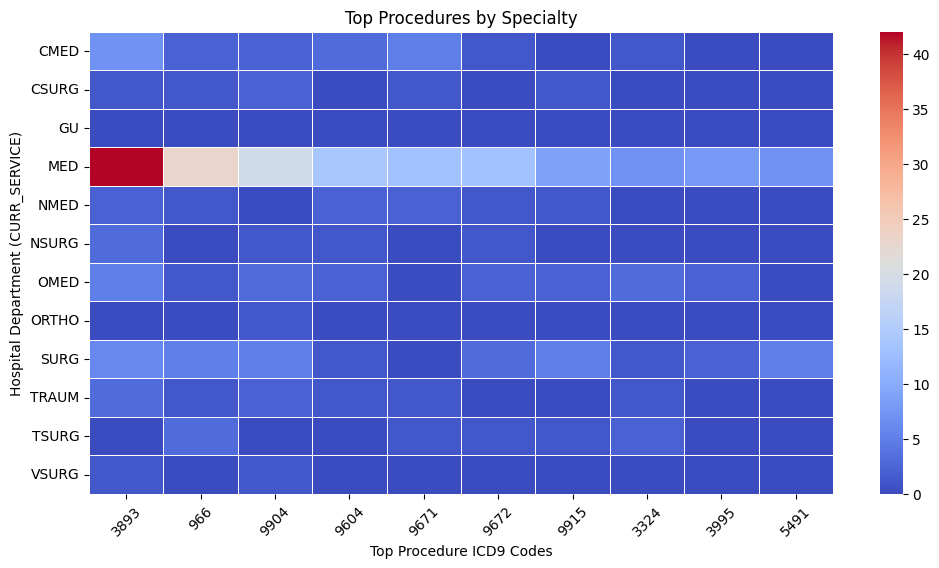

In [27]:
#Top Procedures by Speciality
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
project = "physionet-data"  # Replace with your project ID
dataset_id = "mimiciii_demo"  # Replace with your dataset ID
table_id1 = "procedures_icd"
table_id2 = "services"

# Construct table references
table_ref1 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id1}")
table_ref2 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id2}")

# Get table objects
table1 = client.get_table(table_ref1)
table2 = client.get_table(table_ref2)

procedures = client.list_rows(table1).to_dataframe()
services = client.list_rows(table2).to_dataframe()

# Merge datasets using `HADM_ID`
merged = procedures.merge(services[['HADM_ID', 'CURR_SERVICE']], on='HADM_ID', how='left')

# Drop null values (if any)
merged = merged.dropna(subset=['CURR_SERVICE', 'ICD9_CODE'])

# Count most common procedures by hospital department
heatmap_data = merged.groupby(['CURR_SERVICE', 'ICD9_CODE']).size().unstack(fill_value=0)

# Select top 10 procedures for visualization
top_procedures = heatmap_data.sum().nlargest(10).index
heatmap_data = heatmap_data[top_procedures]

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5)
plt.xlabel("Top Procedure ICD9 Codes")
plt.ylabel("Hospital Department (CURR_SERVICE)")
plt.title("Top Procedures by Specialty")
plt.xticks(rotation=45)
plt.savefig("procedures_specialty_heatmap.png")
plt.show()


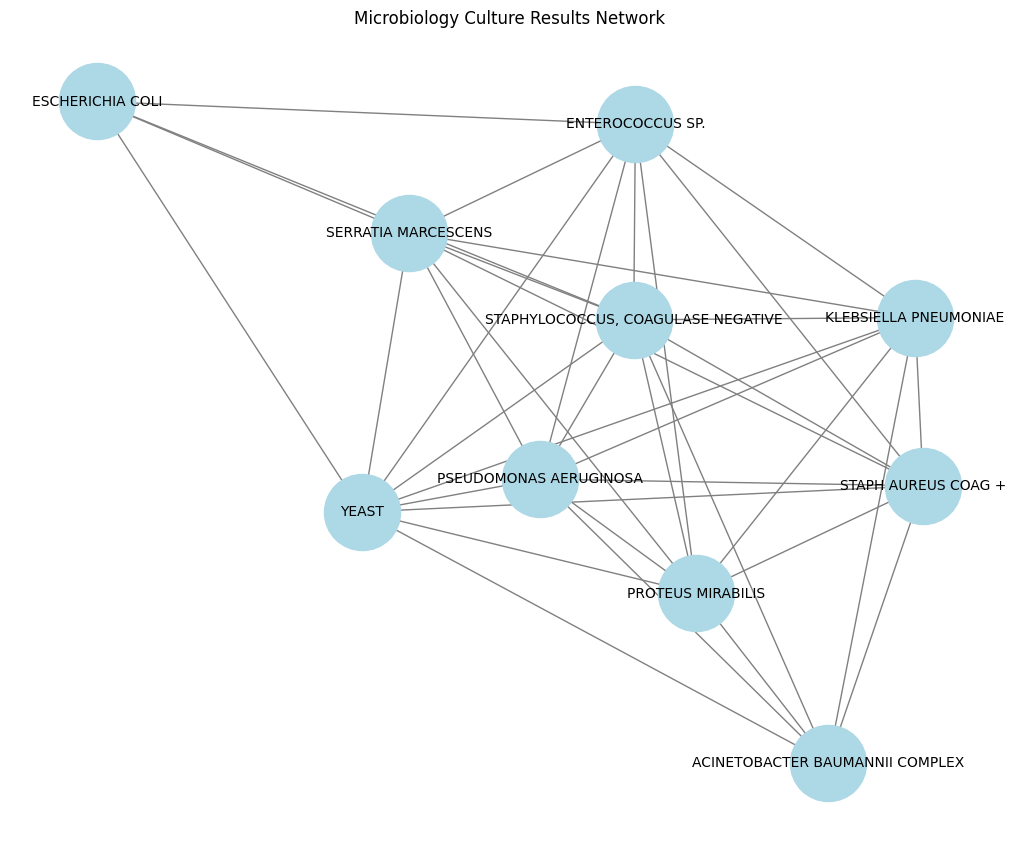

In [28]:
#Bonus -> Microbilogy Culture Results Network
import networkx as nx
# Load datasets
#project = "bigquery-public-data"
#dataset_id = "samples"

auth.authenticate_user()
project_id='ultimate-balm-449016-q6'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
# create a connection to the database
client = bigquery.Client(project='ultimate-balm-449016-q6')

# load the dataset list
datasets = client.list_datasets()

#dataset_ref = bigquery.DatasetReference(project, dataset_id)
project = "physionet-data"  # Replace with your project ID
dataset_id = "mimiciii_demo"  # Replace with your dataset ID
table_id1 = "microbiologyevents"
#table_id2 = "labevents"

# Construct table references
table_ref1 = bigquery.TableReference.from_string(f"{project}.{dataset_id}.{table_id1}")
# Get table objects
table1 = client.get_table(table_ref1)
# Load data into dataframes
microbiology = client.list_rows(table1).to_dataframe()
# Filter most common pathogens
top_pathogens = microbiology['ORG_NAME'].value_counts().head(10).index
filtered = microbiology[microbiology['ORG_NAME'].isin(top_pathogens)]

# Create edges between pathogen co-occurrences
edges = []
for _, group in filtered.groupby('SUBJECT_ID'):
    organisms = list(group['ORG_NAME'].unique())
    for i in range(len(organisms)):
        for j in range(i + 1, len(organisms)):
            edges.append((organisms[i], organisms[j]))

# Create graph
G = nx.Graph()
G.add_edges_from(edges)

# Plot network
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Microbiology Culture Results Network")
plt.savefig("microbiology_network.png")
plt.show()
